In [40]:
from selenium import webdriver

CAMERA_NGUYENTHAISON_PHANVANTRI2_STREET = "https://giaothong.hochiminhcity.gov.vn/expandcameraplayer/?camId=5a6060e08576340017d0660f&camLocation=Nguy%E1%BB%85n%20Th%C3%A1i%20S%C6%A1n%20-%20Phan%20V%C4%83n%20Tr%E1%BB%8B%202&camMode=camera&videoUrl=https://d2zihajmogu5jn.cloudfront.net/bipbop-advanced/bipbop_16x9_variant.m3u8"
CAMERA_HOANGVANTHU_CONGHOA_STREET = "https://giaothong.hochiminhcity.gov.vn/expandcameraplayer/?camId=5d8cdbdc766c88001718896a&camLocation=Ho%C3%A0ng%20V%C4%83n%20Th%E1%BB%A5%20-%20C%E1%BB%99ng%20H%C3%B2a&camMode=camera&videoUrl=https://d2zihajmogu5jn.cloudfront.net/bipbop-advanced/bipbop_16x9_variant.m3u8"
CAMERA_TRUONGCHINH_TANKITANQUY_STREET = "https://giaothong.hochiminhcity.gov.vn/expandcameraplayer/?camId=586e25e1f9fab7001111b0ae&camLocation=Tr%C6%B0%E1%BB%9Dng%20Chinh%20-%20T%C3%A2n%20K%E1%BB%B3%20T%C3%A2n%20Qu%C3%BD&camMode=camera&videoUrl=http://camera.thongtingiaothong.vn/s/586e25e1f9fab7001111b0ae/index.m3u8"
CAMERA_CMT8_TRUONGSON_STREET = "https://giaothong.hochiminhcity.gov.vn/expandcameraplayer/?camId=63ae79aabfd3d90017e8f26a&camLocation=C%C3%A1ch%20M%E1%BA%A1ng%20Th%C3%A1ng%20T%C3%A1m%20-%20Tr%C6%B0%E1%BB%9Dng%20S%C6%A1n&camMode=camera&videoUrl=https://d2zihajmogu5jn.cloudfront.net/bipbop-advanced/bipbop_16x9_variant.m3u8"
options = webdriver.ChromeOptions()
options.add_argument("--headless")
driver = webdriver.Chrome(options = options)

In [45]:
driver.get(CAMERA_NGUYENTHAISON_PHANVANTRI2_STREET)
driver.set_window_size(1920, 1080) 
driver.save_screenshot("cam.png")

True

### Using captured images to count objects


0: 320x640 35 persons, 6 cars, 35 motorcycles, 606.2ms
Speed: 9.6ms preprocess, 606.2ms inference, 3.0ms postprocess per image at shape (1, 3, 320, 640)
number of bicycle: 0
number of car: 6
number of motorcycle: 35
number of bus: 0
number of truck: 0
number of traffic light: 0
number of stop sign: 0


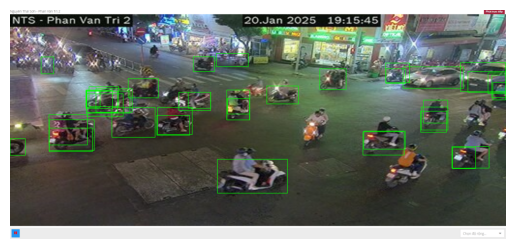

In [46]:
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt

#use yolov8 model
model = YOLO("yolov8s.pt")

#count vehicle
def count_vehicle():
    #set of vehicle count
    vehicle_count = {'bicycle': 0, 'car': 0, 'motorcycle': 0, 
                     'bus': 0, 'truck': 0, 'traffic light': 0, 'stop sign': 0}
    
    #mapping with each vehicle id
    mapping = {1: 'bicycle', 2: 'car', 3: 'motorcycle', 
                5: 'bus', 7: 'truck', 9: 'traffic light', 11: 'stop sign'}
    
    img = cv2.imread("cam.png")

    results = model(img, conf = 0.1)
    results = results[0]

    #names of each vehicle
    vehicle_names = results.names

    for box in results.boxes:
        class_id = int(box.cls)
        if class_id in mapping:
            vehicle_count[mapping[class_id]] += 1
            
            x1, y1, x2, y2 = map(int, box.xyxy[0]) 
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2) 
        
    for vehicle, cnt in vehicle_count.items():
        print(f"number of {vehicle}: {cnt}")

    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

count_vehicle()


# Test code

In [1]:
from selenium import webdriver
from datetime import datetime
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt

""" 
    Create a class for taking screenshot 
    and processing image to count number of vehicles
"""
class Images_Processing:
    #contructor
    def __init__(self, driver: webdriver.Chrome, link: str, street: str):
        #options for taking screenshot
        self._driver = driver
        self._link = link
        self._street = street
        
        #model for detecting vehicles
        self._model = YOLO("yolov8s.pt")
        
        #store vehicle count
        self._vehicle_count = {'street': self._street, 'bicycle': 0, 
                               'car': 0, 'motorcycle': 0, 'bus': 0, 'truck': 0, 
                               'traffic light': 0, 'stop sign': 0,
                               'execution_time': datetime.now().strftime("%Y-%m-%d %H:%M:%S")}

    #take screenshot
    def screen_shot(self):
        self._driver.get(self._link)
        self._driver.set_window_size(1920, 1080) 
        self._driver.save_screenshot(f"{self._street}.png")

    #image processing
    def image_processing(self):
        #mapping with each vehicle id
        mapping = {1: 'bicycle', 2: 'car', 
                   3: 'motorcycle', 5: 'bus', 
                   7: 'truck', 9: 'traffic light', 
                   11: 'stop sign'}

        img = cv2.imread(f"{self._street}.png")

        results = self._model(img, conf = 0.1)
        results = results[0]

        for box in results.boxes:
            class_id = int(box.cls)
            if class_id in mapping:
                self._vehicle_count[mapping[class_id]] += 1
        
                # x1, y1, x2, y2 = map(int, box.xyxy[0]) 
                # cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2) 
    
        for vehicle, cnt in self._vehicle_count.items():
            print(f"number of {vehicle}: {cnt}")

        # plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        # plt.axis('off')
        # plt.show()
    
    #implement taking screenshot and image processing
    def implement(self) -> dict:
        self.screen_shot()
        self.image_processing()
        return self._vehicle_count

In [1]:
from selenium import webdriver
from datetime import datetime
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt

""" 
    Create a class for taking screenshot 
    and processing image to count number of vehicles
"""
class Images_Processing:
    """ Constructor for Images_Processing class"""
    def __init__(self, driver: webdriver.Chrome, camera_list: list):
        self._driver = driver
        self._camera_list = camera_list
        self._model = YOLO("yolov8s.pt")

    """ Take screenshot of the street"""
    def screen_shot(self, street: str, link: str):
        self._driver.get(link)
        self._driver.set_window_size(1920, 1080) 
        self._driver.save_screenshot(f"./screenshot_{street}.png")

    """ Image processing to count number of vehicles"""
    def image_processing(self, street) -> dict:
        #mapping with each vehicle id
        mapping = {1: 'bicycle', 2: 'car', 
                   3: 'motorcycle', 5: 'bus', 
                   7: 'truck', 9: 'traffic light', 
                   11: 'stop sign'}
        
        #initialize vehicle count
        vehicle_count = {'street': street, 'bicycle': 0, 
                    'car': 0, 'motorcycle': 0, 'bus': 0, 'truck': 0, 
                    'traffic light': 0, 'stop sign': 0,
                    'execution_time': datetime.now().strftime("%Y-%m-%d %H:%M:%S")}

        img = cv2.imread(f"./screenshot_{street}.png")

        results = self._model(img, conf = 0.15)
        results = results[0]

        for box in results.boxes:
            class_id = int(box.cls)
            if class_id in mapping:
                vehicle_count[mapping[class_id]] += 1
        
                x1, y1, x2, y2 = map(int, box.xyxy[0]) 
                cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2) 
    
        for vehicle, cnt in vehicle_count.items():
            print(f"number of {vehicle}: {cnt}")

        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()

        return vehicle_count
    
    """ Implement function to take screenshot and process image"""
    def implement(self) -> list:
        
        vehicle_count_list = []

        for street, link in self._camera_list.items():
            self.screen_shot(street, link)
            vehicle_count = self.image_processing(street)
            vehicle_count_list.append(vehicle_count)

        return vehicle_count_list


In [2]:
import requests

""" Class to fetch weather data from OpenWeatherMap API """
class Weather_Fetcher:
    """ Initialize the class with API_KEY and a dictionary """
    def __init__(self, API_KEY: str, lon_lat_dict: dict):
        self._API_KEY = API_KEY
        self._lon_lat_dict = lon_lat_dict
        
    """ Function to fetch weather data from OpenWeatherMap API"""
    def fetch_weather_data(self, longitude: float, latitude: float) -> dict:
        # API call
        API_CALL = f"https://api.openweathermap.org/data/2.5/weather?lat={latitude}&lon={longitude}&appid={self._API_KEY}"
        
        # Get response
        response = requests.get(API_CALL)
        if response.status_code == 200:
            return response.json()
        else:
            return None

    """ Function to parse weather data"""
    def parse_weather_data(self, response) -> dict:
        #initialize variables
        if response:
            longitude = response['coord']['lon']
            weather_id = response['weather'][0]['id']
            main = response['weather'][0]['main']
            description = response['weather'][0]['description']
            temp = response['main']['temp']
            feels_like = response['main']['feels_like']
            temp_min = response['main']['temp_min']
            temp_max = response['main']['temp_max']
            pressure = response['main']['pressure']
            humidity = response['main']['humidity']
            wind_speed = response['wind']['speed']
            wind_deg = response['wind']['deg']
        
            #create a dictionary to store weather data
            weather_data = {
                "longitude": longitude,
                "weather_id": weather_id,
                "main": main,
                "description": description,
                "temp": temp,
                "feels_like": feels_like,
                "temp_min": temp_min,
                "temp_max": temp_max,
                "pressure": pressure,
                "humidity": humidity,
                "wind_speed": wind_speed,
                "wind_deg": wind_deg
            }

        #return weather data
        return weather_data

    """ Function to get weather data for a list of locations"""
    def implement(self) -> list:
        #initialize variables
        weather_data_list = []
        
        for street_name, coordinates in self._lon_lat_dict.items():
            #fetch weather data
            response = self.fetch_weather_data(coordinates['lon'], coordinates['lat'])
            weather_data = self.parse_weather_data(response)
            weather_data['street'] = street_name
            weather_data['execution_time'] = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
            weather_data_list.append(weather_data)

        return weather_data_list

: 


0: 320x640 5 cars, 1 motorcycle, 441.0ms
Speed: 21.5ms preprocess, 441.0ms inference, 24.0ms postprocess per image at shape (1, 3, 320, 640)
number of street: nguyenthaison_phanvantri2
number of bicycle: 0
number of car: 5
number of motorcycle: 1
number of bus: 0
number of truck: 0
number of traffic light: 0
number of stop sign: 0
number of execution_time: 2025-01-27 23:47:39


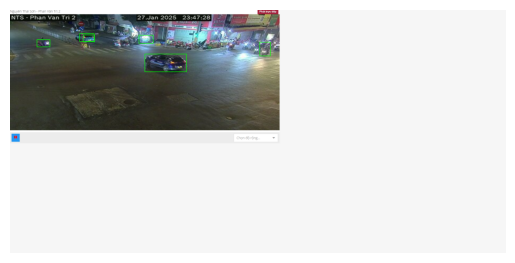


0: 320x640 1 person, 4 cars, 1 motorcycle, 2476.7ms
Speed: 9.0ms preprocess, 2476.7ms inference, 5.0ms postprocess per image at shape (1, 3, 320, 640)
number of street: hoangvanthu_conghoa
number of bicycle: 0
number of car: 4
number of motorcycle: 1
number of bus: 0
number of truck: 0
number of traffic light: 0
number of stop sign: 0
number of execution_time: 2025-01-27 23:47:48


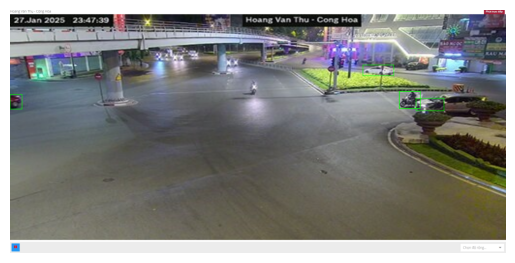


0: 320x640 1 person, 2 motorcycles, 2 traffic lights, 332.2ms
Speed: 4.0ms preprocess, 332.2ms inference, 3.0ms postprocess per image at shape (1, 3, 320, 640)
number of street: truongchinh_tankitanquy
number of bicycle: 0
number of car: 0
number of motorcycle: 2
number of bus: 0
number of truck: 0
number of traffic light: 2
number of stop sign: 0
number of execution_time: 2025-01-27 23:47:55


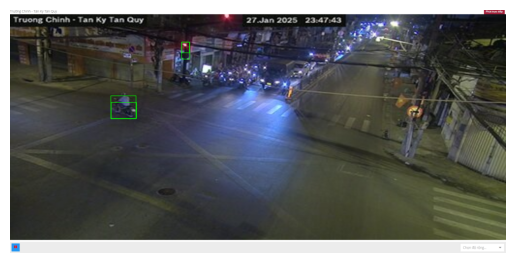


0: 320x640 3 persons, 1 car, 281.6ms
Speed: 3.5ms preprocess, 281.6ms inference, 4.0ms postprocess per image at shape (1, 3, 320, 640)
number of street: cmt8_truongson
number of bicycle: 0
number of car: 1
number of motorcycle: 0
number of bus: 0
number of truck: 0
number of traffic light: 0
number of stop sign: 0
number of execution_time: 2025-01-27 23:47:59


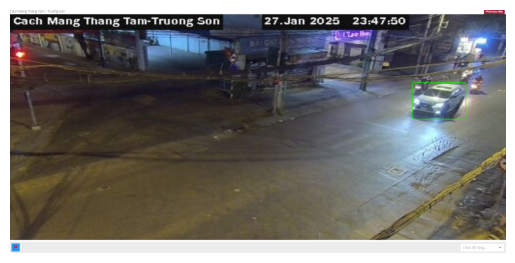

In [ ]:
import json
""" Link camera """
CAMERA_NGUYENTHAISON_PHANVANTRI2_STREET = "https://giaothong.hochiminhcity.gov.vn/expandcameraplayer/?camId=5a6060e08576340017d0660f&camLocation=Nguy%E1%BB%85n%20Th%C3%A1i%20S%C6%A1n%20-%20Phan%20V%C4%83n%20Tr%E1%BB%8B%202&camMode=camera&videoUrl=https://d2zihajmogu5jn.cloudfront.net/bipbop-advanced/bipbop_16x9_variant.m3u8"
CAMERA_HOANGVANTHU_CONGHOA_STREET = "https://giaothong.hochiminhcity.gov.vn/expandcameraplayer/?camId=5d8cdbdc766c88001718896a&camLocation=Ho%C3%A0ng%20V%C4%83n%20Th%E1%BB%A5%20-%20C%E1%BB%99ng%20H%C3%B2a&camMode=camera&videoUrl=https://d2zihajmogu5jn.cloudfront.net/bipbop-advanced/bipbop_16x9_variant.m3u8"
CAMERA_TRUONGCHINH_TANKITANQUY_STREET = "https://giaothong.hochiminhcity.gov.vn/expandcameraplayer/?camId=586e25e1f9fab7001111b0ae&camLocation=Tr%C6%B0%E1%BB%9Dng%20Chinh%20-%20T%C3%A2n%20K%E1%BB%B3%20T%C3%A2n%20Qu%C3%BD&camMode=camera&videoUrl=http://camera.thongtingiaothong.vn/s/586e25e1f9fab7001111b0ae/index.m3u8"
CAMERA_CMT8_TRUONGSON_STREET = "https://giaothong.hochiminhcity.gov.vn/expandcameraplayer/?camId=63ae79aabfd3d90017e8f26a&camLocation=C%C3%A1ch%20M%E1%BA%A1ng%20Th%C3%A1ng%20T%C3%A1m%20-%20Tr%C6%B0%E1%BB%9Dng%20S%C6%A1n&camMode=camera&videoUrl=https://d2zihajmogu5jn.cloudfront.net/bipbop-advanced/bipbop_16x9_variant.m3u8"

""" List of camera """
camera_list = {"nguyenthaison_phanvantri2": CAMERA_NGUYENTHAISON_PHANVANTRI2_STREET, 
               "hoangvanthu_conghoa": CAMERA_HOANGVANTHU_CONGHOA_STREET,
               "truongchinh_tankitanquy": CAMERA_TRUONGCHINH_TANKITANQUY_STREET,
               "cmt8_truongson": CAMERA_CMT8_TRUONGSON_STREET}

""" List of locations and their corresponding latitude and longitude"""
lon_lat_dict = {"nguyenthaison_phanvantri2": {"lat": 10.82642, "lon": 106.68930}, 
                "hoangvanthu_conghoa": {"lat": 10.80081, "lon": 106.66209},
                "truongchinh_tankitanquy": {"lat": 10.80418, "lon": 106.63588},
                "cmt8_truongson": {"lat": 10.78645, "lon": 106.66673}}

if __name__ == "__main__":
    """ Create driver for taking screenshot """
    options = webdriver.ChromeOptions()
    options.add_argument("--headless")
    driver = webdriver.Chrome(options = options)

    image_processor = Images_Processing(driver, camera_list)
    weather_data_fetcher = Weather_Fetcher(API_KEY = "c347802e3c6f24716a91d3cd7670433d", 
                                           lon_lat_dict = lon_lat_dict)

    """ Create producer for sending data to Kafka """
    # producer = Producer({"bootstrap.servers": "localhost:9092"})

    while True:

        vehicle_count_data = image_processor.implement()
        weather_data = weather_data_fetcher.implement()
            
        with open('./data.json', 'a', encoding='utf-8') as f:
            json.dump(vehicle_count_data, f, ensure_ascii=False, indent=4)
            json.dump(weather_data, f, ensure_ascii=False, indent=4)
            
        """ Create producer for sending data to Kafka """

        # for data in data_vehicle_count:
        #     producer.produce("traffic", value = data)


In [26]:
# Giả sử temperature và humidity là các giá trị số thực
temperature = 30.0  # Ví dụ: 30 độ C
humidity = 70.0/100     # Ví dụ: 70% độ ẩm
from math import exp
heat_index = (
    -42.379
    + 2.04901523 * temperature
    + 10.14333127 * humidity
    - 0.22475541 * temperature * humidity
    - 0.00683783 * (temperature ** 2)
    - 0.05481717 * (humidity ** 2)
    + 0.00122874 * (temperature ** 2) * humidity
    + 0.00085282 * temperature * (humidity ** 2)
    - 0.00000199 * (temperature ** 2) * (humidity ** 2)
)

print(f"Heat Index: {heat_index}")

T = 24.95*1.8+32
RH = 0.75
HI = -42.379 + 2.04901523*T + 10.14333127*RH - 0.22475541*T*RH - 0.00683783*T*T - 0.05481717*RH*RH + 0.00122874*T*T*RH + 0.00085282*T*RH*RH - 0.00000199*T*T*RH*RH
print((HI-32)/1.8)

dewpoint = (100 - 0.76)/5
e = 6.11 * exp(5417.7530 * ((1/273.15) - (1/(273.15 + dewpoint))))
h = (0.5555)*(e - 10.0)

print(h + 24.950006103515648)


Heat Index: 16.0767828297
23.809778719086435
32.40399279139983


In [39]:
HI = -42.379 + 2.04901523 x 90 + 10.14333127 x 60 + -0.22475541 x 90 x 60 + -6.83783 x 10−3 x (90)2+-5.481717 x 10−2 x (60)2+ 1.22874 x 10−3 x (90)2× 60 + 8.5282 x 10-4 x 90 x (60)2 + -1.99 x 10−6 x (90)2 x (60)2

23.361865033582593
-27.99700109809023
23.014416113281282
